In [2]:
# Importing the data

# PS: Number of matches won by each team in IPL histroy

import os
import pandas as pd

path = r"C:/Users/Administrator/Desktop/python/EDA/NM class/IPL Data/IPL Data"

os.chdir(path)

os.listdir(path)

ball = pd.read_excel("Ball_by_Ball.xlsx")

match = pd.read_excel("Match.xlsx")

player = pd.read_excel('Player.xlsx')

player_match = pd.read_excel('Player_Match.xlsx')

season = pd.read_excel('Season.xlsx')

team = pd.read_excel('Team.xlsx')

Univariate Analysis - Composition

Lets say we want to check the what teams are deciding after winning the toss?

In [3]:
# Decision after winning the toss

Toss_decision = match.groupby(['Toss_Decision']).size().reset_index()

Toss_decision

# Lets rename the column

Toss_decision = Toss_decision.rename(columns= {0 : "Number of Matches"})

Toss_decision

,Toss_Decision,Number of Matches
0,bat,262
1,field,315


In [4]:
# We can represent the same by a pie chart

from matplotlib import pyplot as plt

# We will use autopct to indicate percent lables on pie chart

plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%')

plt.show()


<Figure size 640x480 with 1 Axes>

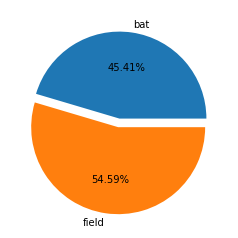

In [5]:
# I can also use the functions like pctdistance, labeldistance, explode

explode = (0, 0.1)

plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', explode=explode)

plt.show()

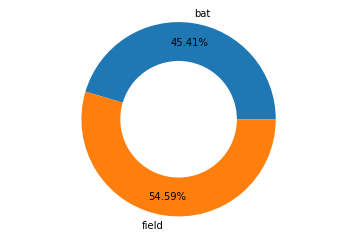

In [6]:
# Can also create a donut chart from this pie

# we can just change pie chart to donut chart by drawing a circle with white color at origin.

# draw a circle centered at (0,0)

plt.pie(Toss_decision['Number of Matches'], labels=Toss_decision['Toss_Decision'], autopct='%.2f%%', pctdistance = 0.8)

centre_circle = plt.Circle((0,0),0.60,fc='white')

fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.axis('equal')

plt.show()

Univariate - Numerical column

What all we can do?

1) We can check to distribution of data 
2) We can check for outliers
3) We can create buckets (bins) to check the frequency of numbers

In [14]:
# Understanding the data distribution

# Lets change the data set as this data set do not have much numerical column


car = pd.read_csv('C:/Users/Administrator/Desktop/python/EDA/Car_sales.csv')

car.head()


,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639


In [15]:
# Lets check if the city milage and highway milage is normally distributed

# Lets first check overall city milage and highway milage

# City milage distribution

from matplotlib import pyplot as plt

plt.hist(car['cty'])

plt.xlabel('City Milage')

plt.ylabel('Number of Cars')

plt.show()

KeyError: 'cty'

NameError: name 'car' is not defined

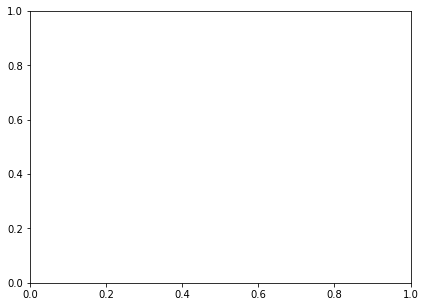

In [9]:
# In case if you want to plot both city milage and highway milage side by side

plt.rcParams['figure.figsize'] = [15,5]

fig = plt.figure()

plt.subplot(1, 2, 1)
plt.hist(car['cty'])
plt.xlabel('City Milage')

plt.subplot(1, 2, 2)
plt.hist(car['hwy'])
plt.xlabel('Highway Milage')

plt.show()

In [ ]:
# Lets see how the city milage distribution vary for each class

import seaborn as sns

from matplotlib import pyplot as plt

g = sns.FacetGrid(car, col="class")

g = g.map(plt.hist, "cty")


In [ ]:
# Now that we have seen that the city milage and highway milage are not normally distributed.
# We would like to see if the skewness in the city milage and highway milage is very high?

car.skew()

In [ ]:
# Skewness treatment 

import numpy as np

car['cty_log'] = np.log(car['cty'])

car['cty_sqrt'] = np.sqrt(car['cty'])

car.skew()

In [ ]:
# Skewness in data also mean that my data will have outliers

# Checking the outliers in city milage manually

# Step 1: FInd the quatiles of city milage

Quatiles = car['cty'].quantile([0.25,0.5,0.75])

Quatiles

# Step 2: Finding the IQR

IQR = 19-14

# Step 3: Finding upper wishker and lower wishker

UW = 19 + 1.5*IQR
LW = 14 - 1.5*IQR

print(UW)
print(LW)

# labelling the rows as outliers or not

car['Outlier'] = np.where((car['cty']> UW) | (car['cty'] < LW), "Outlier", "Safe")

car.head()

# Creating cross table of Outlier

Out_table = pd.crosstab(index=car['Outlier'], columns="No. of Cars").reset_index()

Out_table

In [ ]:
# Or we can also plot this in a form of a box plot

plt.rcParams['figure.figsize'] = [15,5]

# Matplotlib box plot using only one column

plt.boxplot(car.cty)

plt.xticks([1], ['cty'])

In [ ]:
# Creating multiple column box plot - City mileage and highway mileage

# First step is to convert the pandas data frame to a numpy array

data = car[['cty', 'hwy']].values

data

plt.boxplot(data)

plt.xticks([1,2], ['cty', 'hwy'])

In [ ]:
# Using seaborn lib - also adding a categorical column - City milage for each class

import seaborn as sns

sns.boxplot(data=car, x='class', y='cty')

# Controlling the order of diplay of class

order=["subcompact", "compact", "midsize", "pickup", "suv", "2seater", "minivan"]

sns.boxplot(data=car, x='class', y='cty', order=order)